# 3D SARS-CoV-19 Protein Visualisation With Biopython

# Table of contents:<br>
1. [Attributes of Biopython](#1.-Attributes-of-Biopython)
2. [Understand FASTA file format](#2.-Understanding-FASTA-file-format)
3. [Sequence manipulation using Biopython](#3.-Sequence-manipulation-using-Biopython)
4. [Transcription & Translation studies](#4.-Transcription-&-Translation-Studies)
5. [Perform Basic Local Alignment using NCBI-BLAST](#5.-Basic-Local-Alignment-Using-NCBI-BLAST)
6. [Reading PDB file](#6.-Reading-PDB-file)
7. [Visualizing SARS-CoV-19 Protein structure](#7.-Visualizing-SARS-CoV-19-Protein-structure)

## Modules

In [1]:
import Bio
import pylab
import urllib
import pandas as pd
import nglview as nv
from Bio.Seq import Seq
from Bio.Blast import NCBIWWW
from Bio.Alphabet import IUPAC
from collections import Counter
from Bio.Data import CodonTable
from Bio import SeqIO, SearchIO
from Bio.PDB import PDBParser,MMCIFParser
from Bio.SeqUtils import GC,molecular_weight
from Bio.Alphabet import generic_dna,generic_rna,generic_protein

## 1. Attributes of Biopython

In [2]:
# Check Attributes of Biopython
dir(Bio)

['Align',
 'Alphabet',
 'BiopythonDeprecationWarning',
 'BiopythonExperimentalWarning',
 'BiopythonParserWarning',
 'BiopythonWarning',
 'Blast',
 'Data',
 'File',
 'GenBank',
 'MissingExternalDependencyError',
 'MissingPythonDependencyError',
 'PDB',
 'SVDSuperimposer',
 'SearchIO',
 'Seq',
 'SeqFeature',
 'SeqIO',
 'SeqRecord',
 'SeqUtils',
 'Sequencing',
 'StreamModeError',
 'SwissProt',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_parent_dir',
 'os',
 'warnings']

## 2. Understanding FASTA file format

#### SEQUENCE SOURCE

<a href="https://www.ncbi.nlm.nih.gov/nuccore/MN908947.3?report=fasta"> **SARS-CoV-19 SEQUENCE FROM NCBI**<a>

### GENETIC MATERIAL

<div class="alert alert-block alert-info" style="Font-size:16px">

**DNA** (Deoxy-Ribonucleic Acid) constitutes of 4 Bases **A T G C**<br>
**RNA** (Ribonucleic Acid) is composed of **U** instead of **T**<br>
    
</div>

### 2.1. FASTA Format

### FASTA File

    
**\> Description_of_DNA_sequence**
<br>
ATGCTGCGAGACAGACAGACATACTATCATCTCAGACGCAG<br>
ATGCTGCGAGACAGACAGACATACTATCATCTCAGACGCAG<br>


### 2.2. Reading from file

In [3]:
# Loading FASTA file
seq_file_read=SeqIO.read("Sequence_data/sequence.fasta","fasta")

In [4]:
seq_file_read

SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA', SingleLetterAlphabet()), id='MN908947.3', name='MN908947.3', description='MN908947.3 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome', dbxrefs=[])

In [5]:
type(seq_file_read)

Bio.SeqRecord.SeqRecord

### 2.3 Sequence details

In [6]:
# list sequence details
seq_file_read.id

'MN908947.3'

In [7]:
seqfromfile = seq_file_read.seq

In [8]:
# list sequence details
for record in SeqIO.parse('Sequence_data/sequence.fasta', "fasta"):
    print(record)

ID: MN908947.3
Name: MN908947.3
Description: MN908947.3 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
Number of features: 0
Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA', SingleLetterAlphabet())


In [9]:
# store sequence for later analysis
seqfromfile = record.seq
seqfromfile

Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA', SingleLetterAlphabet())

In [10]:
# length of sequence
len(seqfromfile)

29903

In [11]:
#molecular weight
molecular_weight(seqfromfile)

9241219.214400413

## 3. Sequence manipulation using Biopython

<div class="alert alert-block alert-warning" style="Font-size:16px">
- indexing/slicing<br>
- concatination<br>
- codon search<br>
- GC content<br>
- complement<br>

</div>

### 3.1. Indexing / Slicing

In [12]:
# CODON
seqfromfile[0:4]

Seq('ATTA', SingleLetterAlphabet())

In [13]:
seqfromfile[0:3]+seqfromfile[-3:]

Seq('ATTAAA', SingleLetterAlphabet())

### 3.2. Concatination

In [14]:
concat = seqfromfile[:6]+seqfromfile[-5:]
concat

Seq('ATTAAAAAAAA', SingleLetterAlphabet())

### 3.3. Codon Search

In [15]:
seqfromfile.find('AGA')

54

### 3.4. GC Content

In [16]:
# LOGIC
(seqfromfile.count('G')+seqfromfile.count('C'))/(len(seqfromfile))*100

37.97277865097147

In [17]:
#GC content using Biopython
GC(seqfromfile)

37.97277865097148

### 3.5. Complement

<div class="alert alert-block alert-info" style="Font-size:16px">

In **DNA** <br>
    **A** Bonds with **T** (DOUBLE BOND)<br>
    **G** Bonds with **C** (TRIPLE BOND)<br>
    
</div>

In [18]:
#complement

seqfromfile[:11].complement()

Seq('TAATTTCCAAA', SingleLetterAlphabet())

In [19]:
#reverse complement
seqfromfile[:11].reverse_complement()


Seq('AAACCTTTAAT', SingleLetterAlphabet())

In [20]:
seqfromfile[-10:].reverse_complement()

Seq('TTTTTTTTTT', SingleLetterAlphabet())

## 4. Transcription & Translation Studies

<div class="alert alert-block alert-warning" style="font-size:16px">
DNA > RNA = Transcription
</div>
<div class="alert alert-block alert-warning" style="font-size:16px">
mRNA > amino acid (protein) = Translation
</div>

### 4.1. Transcription

In [21]:
#Transcribe

mRNA = seqfromfile.transcribe()
mRNA[:10]

Seq('AUUAAAGGUU', RNAAlphabet())

In [22]:
#Back transcribe

mRNA.back_transcribe()


Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA', DNAAlphabet())

### 4.2. Translation

In [23]:
print(CodonTable.unambiguous_dna_by_id[1])

Table 1 Standard, SGC0

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA Stop| A
T | TTG L(s)| TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I   | ACT T   | AAT N   | AGT S   | T
A | ATC I   | ACC T   | AAC N   | AGC S   | C
A | ATA I   | ACA T   | AAA K   | AGA R   | A
A | ATG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V   | GCG A   | GAG E   | GGG G   | G
--+---------

In [24]:
protein_seq = seqfromfile.translate()
protein_seq[:10]

/home/rhyme/.local/lib/python3.6/site-packages/Bio/Seq.py:2742: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


Seq('IKGLYLPR*Q', HasStopCodon(ExtendedIUPACProtein(), '*'))

In [25]:
len(protein_seq)

9967

In [26]:
len(seqfromfile)

29903

### Can protein sequences be reverse translated ?
<div class="alert alert-block alert-info">
<b>Note</b> : there is no function called `back_translate` so we'll make use of `back_transcribe`.
</div>

In [27]:
protein_seq.back_transcribe()

ValueError: Proteins cannot be back transcribed!

### This error is true for all the biological life too...
<div class="alert alert-block alert-warning">
- we can't perform an exact "reverse translation" of course, since several amino acids are produced by the same codon.
</div>

In [28]:
print(CodonTable.unambiguous_dna_by_id[1])

Table 1 Standard, SGC0

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA Stop| A
T | TTG L(s)| TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I   | ACT T   | AAT N   | AGT S   | T
A | ATC I   | ACC T   | AAC N   | AGC S   | C
A | ATA I   | ACA T   | AAA K   | AGA R   | A
A | ATG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V   | GCG A   | GAG E   | GGG G   | G
--+---------

In [29]:
# Listing the most common amino acids
common_amino = Counter(protein_seq)
common_amino.most_common(10)

[('L', 886),
 ('S', 810),
 ('*', 774),
 ('T', 679),
 ('C', 635),
 ('F', 593),
 ('R', 558),
 ('V', 548),
 ('Y', 505),
 ('N', 472)]

Text(0, 0.5, 'frequency')

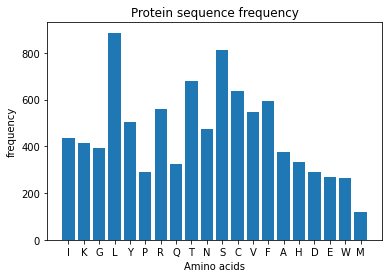

In [30]:
# visualize all 20 amino acid occurrences in the form of a histogram

del common_amino['*']
pylab.bar(common_amino.keys(), common_amino.values())
pylab.title("Protein sequence frequency")
pylab.xlabel("Amino acids")
pylab.ylabel("frequency")

### Since stop codon * signifies end of a protein we can split the sequence using ( * )

In [31]:
protein_list = [str(i) for i in protein_seq.split('*')]
protein_list[:10]

['IKGLYLPR',
 'QTNQLSISCRSVL',
 'TNFKICVAVTRLHA',
 'CTHAV',
 'LITNYCR',
 'QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER',
 'DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS',
 'RWHLWLSRS',
 'KRRFAST',
 'TALCVHQTFGCSNCTSWSCYG']

In [32]:
# convert sequences to dataframe
large_proteins = [x for x in protein_list if len(x)>10]
df = pd.DataFrame({'protein_seq':large_proteins})

In [33]:
# Add a column with sequence lengths
df['length'] = df['protein_seq'].apply(len)

df.head()

,protein_seq,length
0,QTNQLSISCRSVL,13
1,TNFKICVAVTRLHA,14
2,QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER,35
3,DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS,46
4,TALCVHQTFGCSNCTSWSCYG,21


In [34]:
# sort sequence data

df.sort_values(by = ['length'], ascending = False)[:10]

,protein_seq,length
118,CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFL...,2701
157,ASAQRSQITLHINELMDLFMRIFTIGTVTLKQGEIKDATPSDFVRA...,290
168,TNMKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNS...,123
158,AQADEYELMYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALR...,83
167,QQMFHLVDFQVTIAEILLIIMRTFKVSIWNLDYIINLIIKNLSKSL...,63
3,DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS,46
93,TMLRCYFPKCSEKNNQGYTPLVVTHNFDFTFSFSPEYSMVFVLFFV,46
188,KSHHIFTEATRSTIECTVNNARESCLYGRALMCKINFSSAIPM,43
116,DVVYTHWYWSGNNSYTGSQYGSRILWWCIVLSVLPLPHRSSKS,43
182,LQTLAANCTICPQRFSVLRNVAHWHGSHTFGNVVDLHRCHQIG,43


In [35]:
# let's take a single protein from the table

one_large_protein = df.nlargest(1,"length")
single_prot = one_large_protein.iloc[0,0]
single_prot

'CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNCCRFQEKDEDDNLIDSYFVVKRHTFSNYQHEETIYNLLKDCPAVAKHDFFKFRIDGDMVPHISRQRLTKYTMADLVYALRHFDEGNCDTLKEILVTYNCCDDDYFNKKDWYDFVENPDILRVYANLGERVRQALLKTVQFCDAMRNAGIVGVLTLDNQDLNGNWYDFGDFIQTTPGSGVPVVDSYYSLLMPILTLTRALTAESHVDTDLTKPYIKWDLLKYDFTEERLKLFDRYFKYWDQTYHPNCVNCLDDRCILHCANFNVLFSTVFPPTSFGPLVRKIFVDGVPFVVSTGYHFRELGVVHNQDVNLHSSRLSFKELLVYAADPAMHAASGNLLLDKRTTCFSVAALTNNVAFQTVKPGNFNKDFYDFAVSKGFFKEGSSVELKHFFFAQDGNAAISDYDYYRYNLPTMCDIRQLLFVVEVVDKYFDCYDGGCINANQVIVNNLDKSAGFPFNKWGKARLYYDSMSYEDQDALFAYTKRNVIPTITQMNLKYAISAKNRARTVAGVSICSTMTNRQFHQKLLKSIAATRGATVVIGTSKFYGGWHNMLKTVYSDVENPHLMGWDYPKCDRAMPNMLRIMASLVLARKHTTCCSLSHRFYRLANECAQVLSEMVMCGGSLYVKPGGTSSGDATTAYANSVFNICQAVTANVNALLSTDGNKIADKYVRNLQHRLYECLYRNRDVDTDFVNEFYAYLRKHFSMMILSDDAVVCFNSTYASQGLVASIKNFKSVLYYQNNVFMSEAKCWTETDLTKGPHEFCSQHTMLVKQGDDYVYLPYPDPSRILGAGCFVDDIVKTDGTLMIERFVSLAIDAYPLTKHPNQEYADVFHLYLQYIRKLHDELTGHMLDMYSVMLTNDNTSRYWEPEFYEAMYTPHTVLQAVGACVLCNSQTSLRCGACIRRPFLCCKCCYDHVISTSHKLVLSVNPYVCNAPGCDVTDVTQLYLGGMSY

In [36]:
# write to a file

with open("Sequence_data/single_prot.fasta","w") as file:
    file.write(">large protein\n" +single_prot)

## 5. Basic Local Alignment Using NCBI-BLAST

In [37]:
# Read single_seq.fasta

read =  SeqIO.read("Sequence_data/single_prot.fasta","fasta")
read.seq

Seq('CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNCCRFQ...VNN', SingleLetterAlphabet())

In [38]:

%%time
# based on the server load this query might take 2-3 minutes to run

result_handle = NCBIWWW.qblast("blastp",'pdb',read.seq)
blast_qresults = SearchIO.read(result_handle,"blast-xml")

CPU times: user 46.3 ms, sys: 8.73 ms, total: 55 ms
Wall time: 1min


In [42]:
print(blast_qresults[0:5])


Program: blastp (2.15.0+)
  Query: unnamed (2701)
         protein product
 Target: pdb
   Hits: ----  -----  ----------------------------------------------------------
            #  # HSP  ID + description
         ----  -----  ----------------------------------------------------------
            0      1  pdb|7D4F|A  Chain A, RNA-directed RNA polymerase [Sever...
            1      1  pdb|6YYT|A  Chain A, nsp12 [Severe acute respiratory sy...
            2      1  pdb|6XEZ|A  Chain A, RNA-directed RNA polymerase [Sever...
            3      1  pdb|7BW4|A  Chain A, RNA-directed RNA polymerase [Sever...
            4      1  pdb|6XQB|A  Chain A, RNA-directed RNA polymerase [Sever...


In [43]:
#fetch the id, description, evalue, bitscore & alignment of first hit

seqid = blast_qresults[0]

details = seqid[0]

print(f"\
Sequence ID:{seqid.id}\n\
description:{seqid.description}\n\
E value:    {details.evalue} \n\
Bit Score:  {details.bitscore}\n\
")

Sequence ID:pdb|7D4F|A
description:Chain A, RNA-directed RNA polymerase [Severe acute respiratory syndrome coronavirus 2]
E value:    0.0 
Bit Score:  1938.7



In [44]:
print(f"alignment:\n{details.aln}")

alignment:
ProteinAlphabet() alignment with 2 rows and 926 columns
FKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKT...LQA unnamed
LNRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKT...LQG pdb|7D4F|A


## 6. Reading PDB file

### Retreiving PDB Structure From RCSB PDB

In [45]:
seqid.id

'pdb|7D4F|A'

In [47]:
# split seqid

seqid.id.split('|')[1]

'7D4F'

In [51]:
# link format https://files.rcsb.org/download/6YYT.pdb

urllib.request.urlretrieve('https://files.rcsb.org/download/7D4F.pdb','Sequence_data/7D4F.pdb')

('Sequence_data/7D4F.pdb', <http.client.HTTPMessage at 0x7f8b790466d8>)

### 6.1 Reading PDB file

In [53]:
parser = PDBParser()
structure = parser.get_structure("7D4F", "Sequence_data/7D4F.pdb")
structure

<Structure id=7D4F>

### 6.2 Identifying the number of chains

In [55]:
for chain in structure[0]:
    print(f"chain ID: {chain.id}")

chain ID: B
chain ID: C
chain ID: G
chain ID: A


## 7. Visualizing SARS-CoV-19 Protein structure

### 7.1. nglview

In [56]:
nv.demo()

NGLWidget()

In [57]:
view = nv.show_biopython(structure)
view

NGLWidget()

In [59]:
view.render_image()

Image(value=b'', width='99%')

### 7.2. nglview GUI

In [60]:
#GUI
nv.show_biopython(structure,gui=True)

NGLWidget()

## Observation:<br>
<div style="Font-size:16px">
A. Length 29903 base pairs<br>
B. GC content 37.97<br>
C. Protein content has high L & the largest protein is of length 2701 Amino acid<br>
D. Largest protein BLAST results corresponds to <b>SARS-CoV-19</b> 7D4F <br>
E. Protein 7D4F has 4 chains<br>
</div>